In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [23]:
data = pd.read_csv("/content/bacteria.csv")

In [24]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


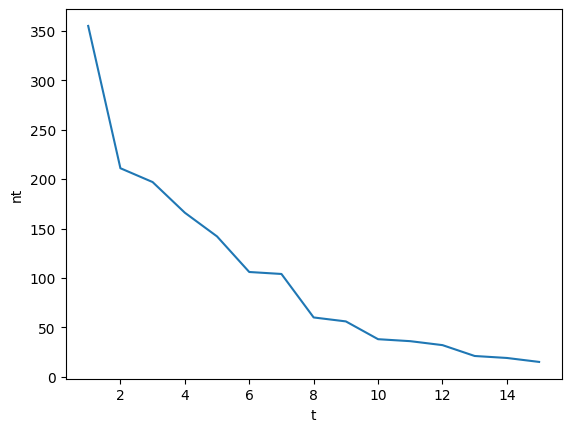

In [25]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [26]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

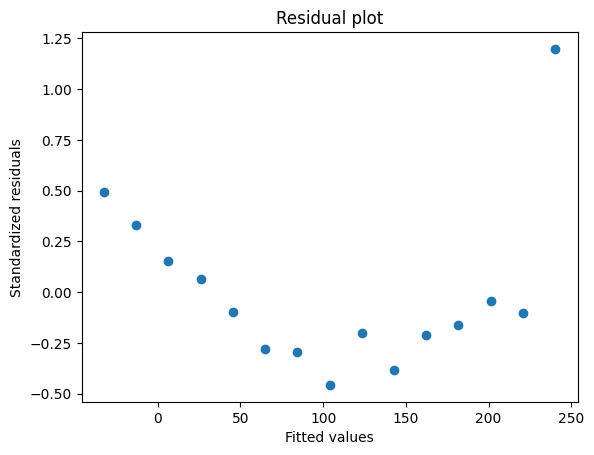

In [27]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

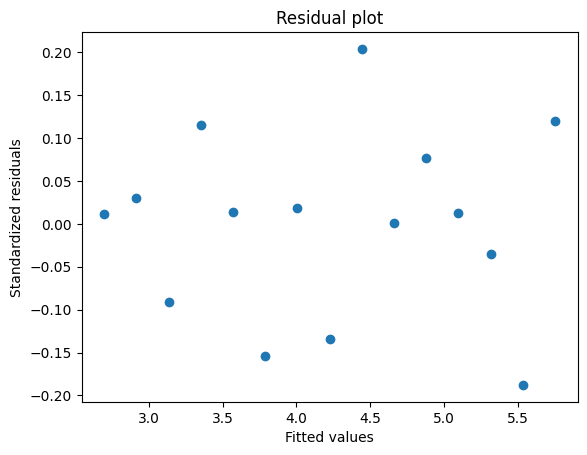

In [31]:
# ans: log transformation

data['log_nt'] = np.log(data['nt'])

model = LinearRegression()
model.fit(data[['t']], data['log_nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['log_nt'] - fitted_values) / data['log_nt'].std()

# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

## 잔차의 분포가 고르게 퍼진 것을 확인

### Q2

In [43]:
# 데이터 로드
data2 = pd.read_csv("/content/artificial1.csv")

In [44]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [45]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [46]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        05:27:27   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

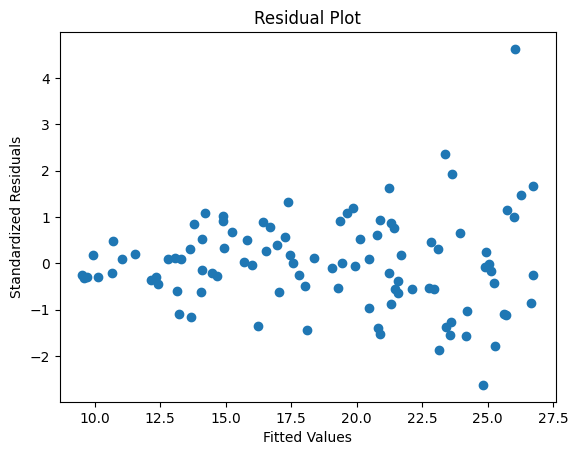

In [47]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

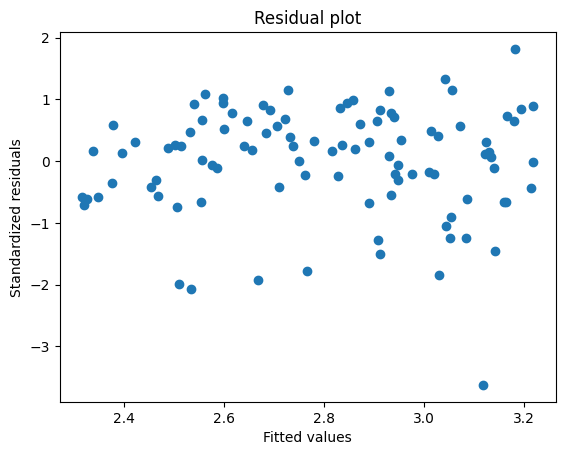

In [48]:
# ans1: log transformation

data2['log_Y'] = np.log(data2['Y'])

model = LinearRegression()
model.fit(data2[['X']], data2['log_Y'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data2[['X']])
standardized_residuals = (data2['log_Y'] - fitted_values) / data2['log_Y'].std()

# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

## 잔차의 분포가 상대적으로 고르게 퍼진 것 확인.

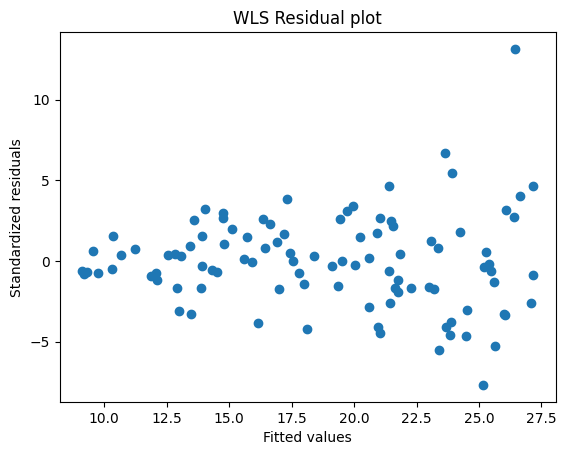

In [42]:
# ans2 : WLS
wls_weight = 1 / np.square(result1.fittedvalues)
wls_model = smf.wls('Y ~ X', data = data2, weights = wls_weight).fit()
wls_fit = wls_model.predict()

# standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()
wls_residuals = (data2['Y'] - wls_fit) / data2['X'].std()

# residual plot
plt.scatter(wls_fit, wls_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('WLS Residual plot')
plt.show()

## 원본 잔차 분포와 유사한 패턴이 여전히 유지됨 -> fail

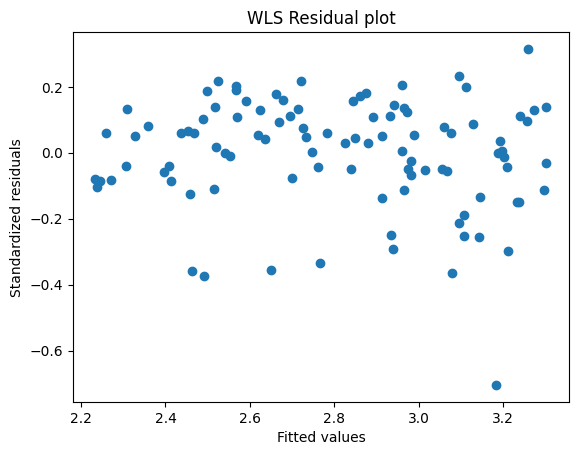

In [49]:
# 번외... : WLS code에 Log transformation한 Y 적용

wls_weight = 1 / np.square(result1.fittedvalues)
wls_model = smf.wls('log_Y ~ X', data = data2, weights = wls_weight).fit()
wls_fit = wls_model.predict()

# standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()
wls_residuals = (data2['log_Y'] - wls_fit) / data2['X'].std()

# residual plot
plt.scatter(wls_fit, wls_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('WLS Residual plot')
plt.show()

## log transformation만 적용한 것과 유사하나 잔차의 scale이 감소

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.


ans :  
등분산성은 독립 변수 X의 값에 대해서 종속 변수 Y의 분산이 일정하다는 것을 의미한다. 즉, 회귀 모델이 X에 대해 일관된 예측 정확도를 가진다는 뜻이기 때문에 이것이 만족되지 않으면 모델의 예측 결과를 신뢰하기 어려워진다.